**2.** **Clustering**

a. Visualize and pre-process the data as appropriate from the file DataClustering.csv. 
You might have to use a power, an exponential, or a log transformation. [1]

b. Train k-means, and find the appropriate number of k. [1]

c. Using the cluster assignment as the label, visualize the t-sne embedding. [1]

Importing libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [41]:
clustering_data = pd.read_csv('/content/DataClustering.csv')# importing data from files and printing data
clustering_data

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


In [42]:
clustering_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


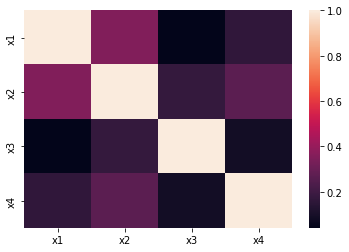

In [43]:
corr = clustering_data.corr(method='spearman') #checking correlation and ploting it on heatmap
fig,ax = plt.subplots()
sns.heatmap(abs(corr),annot=False)# ploting heatmap

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad4cd06510>,
      dtype=object)

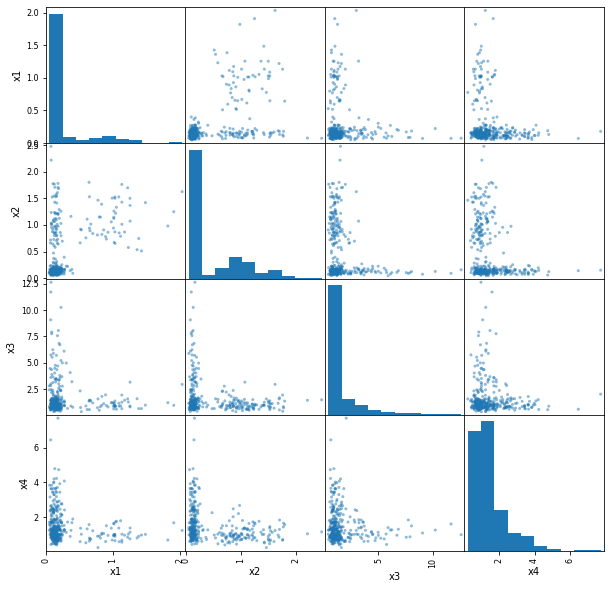

In [44]:
pd.plotting.scatter_matrix(clustering_data, figsize= (10, 10)) #visualizing data through scatter plot

**observation**

most of the datas are left skewed. now we will do transformation.

**transformation**

logrithmic transformation using numpy library

In [45]:
data_log= np.log(clustering_data)#transforming data using logrithmic transformation
data_log

,x1,x2,x3,x4
0,-0.183497,0.328892,-0.038506,-0.006349
1,0.228002,0.405790,-0.100796,-0.303764
2,-0.023316,0.056876,0.196825,0.305452
3,0.014262,0.115722,0.178854,-0.015983
4,0.040552,0.198042,-0.145235,0.542804
...,...,...,...,...
346,-1.590240,-1.631050,1.017763,0.602419
347,-1.472374,-2.028641,-0.350615,1.016288
348,-2.344683,-2.230949,-0.054679,1.233906
349,-2.192030,-2.032790,0.094329,0.831038


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad4ec92590>,
      dtype=object)

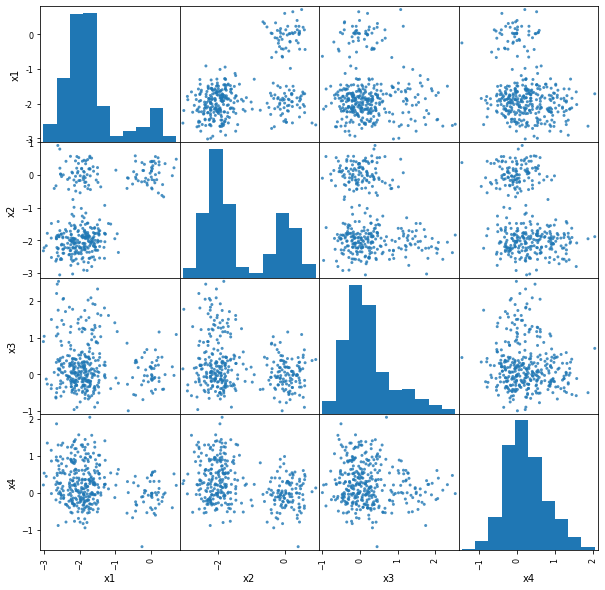

In [46]:
pd.plotting.scatter_matrix(data_log, alpha=0.8, figsize= (10, 10))#plotting scatter plot after transformation

after log transformation data is forming some cluster, we can see it in the plot. after log transformation we can do clustering.

**power transformation (square root)**

In [47]:
data_sqrt= np.sqrt(clustering_data)#transforming data using power transformation
data_sqrt

,x1,x2,x3,x4
0,0.912334,1.178740,0.980931,0.996830
1,1.120753,1.224944,0.950851,0.859090
2,0.988409,1.028846,1.103418,1.165006
3,1.007157,1.059568,1.093548,0.992040
4,1.020483,1.104090,0.929957,1.311802
...,...,...,...,...
346,0.451527,0.442407,1.663430,1.351493
347,0.478937,0.362649,0.839199,1.662203
348,0.309641,0.327760,0.973031,1.853273
349,0.334200,0.361897,1.048295,1.515157


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad4c224710>,
      dtype=object)

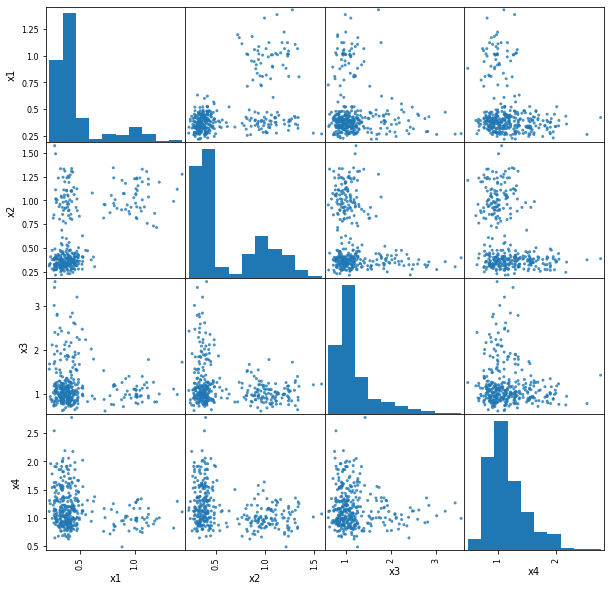

In [48]:
pd.plotting.scatter_matrix(data_sqrt, alpha=0.8, figsize= (10, 10))#plotting scatter plot after transformation

**Training K-means clustering to find optimal value for k**

**Elbow Method**

using log transformed values

references: https://www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/*italicized

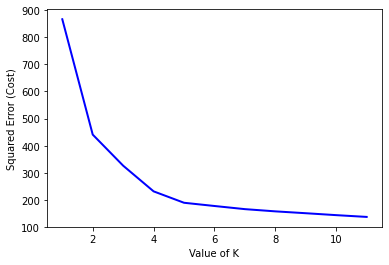

In [49]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
cost =[]
for i in range(1, 12):
	KM = KMeans(n_clusters = i, max_iter = 1000)
	KM.fit(data_log)
	cost.append(KM.inertia_)	# calculating square error
plt.plot(range(1, 12), cost, color ='b', linewidth ='2')# ploting the cost against K values
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # to show the plot

the point of albow is the optimal value of K. here the optimal value is 2 as per graph.

**Silhouette method**

using log transformed values

references: https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891#:~:text=The%20silhouette%20Method%20is%20also,cluster%20compared%20to%20other%20clusters.

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] # Initializing the cluster with n_clusters value 
for n_clusters in range_n_clusters:
    k_clustering = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = k_clustering.fit_predict(data_log)
    silhouette_avg = silhouette_score(data_log, cluster_labels) #The silhouette_score gives the average value for all the samples.
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4638908316913745
For n_clusters = 3 The average silhouette_score is : 0.4582120079960883
For n_clusters = 4 The average silhouette_score is : 0.42176450697964635
For n_clusters = 5 The average silhouette_score is : 0.37562625904859126
For n_clusters = 6 The average silhouette_score is : 0.34187206113332996
For n_clusters = 7 The average silhouette_score is : 0.3306208666556574
For n_clusters = 8 The average silhouette_score is : 0.3031971899841084
For n_clusters = 9 The average silhouette_score is : 0.22168505402436697
For n_clusters = 10 The average silhouette_score is : 0.2192037146701894


we can see that average silhouette_score is highest for 2 followed by 3,4 respectively.

**visualizing the t-sne embedding**

references:

https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


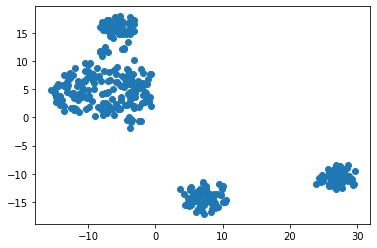

In [51]:
from sklearn.manifold import TSNE #importing TSNE from sklearn
t_sne= TSNE(n_components=2, perplexity=40, random_state=42)# assinging values (parameter tuning)
data_log_tsne= t_sne.fit_transform(data_log)
plt.scatter(data_log_tsne[:,0], data_log_tsne[:,1])#ploting scatter plot

**observations and conclusion:**

first we have visualize the data and then transformed data using logrithmic method and square root method, so that we can get cluster of the data. we have found that logrithmic method is providing good cluster so we have use transformed data from logrithmic method for further process. we have used two methods for finding number of clusters i.e. elbow method and Silhouette method. we have found that both methods are showing 2 as optimal number of clusters. For n_clusters = 2 The average silhouette_score is hoighest. finaaly we have visualized the dataset using t_sne.

**references:**

**friends:**

Harshit Agrawal

Ambadash Maske

https://www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/*italicized/

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891#:~:text=The%20silhouette%20Method%20is%20also,cluster%20compared%20to%20other%20clusters.

https://learnopencv.com/t-sne-for-feature-visualization/

https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
